In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/datamaestro2020/sample_submission.csv
/kaggle/input/datamaestro2020/astro_train.csv
/kaggle/input/datamaestro2020/astro_test.csv


In [2]:
train=pd.read_csv("/kaggle/input/datamaestro2020/astro_train.csv")
test=pd.read_csv("/kaggle/input/datamaestro2020/astro_test.csv")
sub=pd.read_csv("/kaggle/input/datamaestro2020/sample_submission.csv")

In [3]:
train.head()

,id,dered_i,dered_z,dered_u,dered_g,dered_r,err_i,err_z,err_u,err_g,...,skyVersion,run,rerun,camCol,field,obj,photoz,#ra,dec,class
0,0,15.1459,14.9723,18.6394,16.4080,15.4896,0.00195,0.00406,0.02796,0.00279,...,1,745,40,2,518,5,2.64988,236.22077,-0.58795,0
1,1,17.3579,17.3498,18.5273,17.6527,17.4296,0.00757,0.02498,0.02484,0.00536,...,1,745,40,2,518,8,2.63438,236.22135,-0.46320,0
2,2,20.6154,19.7785,25.4019,23.4824,22.5504,0.10071,0.16768,0.75381,0.46380,...,1,745,40,2,518,9,1.65738,236.22055,-0.46434,0
3,3,15.0188,14.9927,16.7971,15.5712,15.1534,0.00183,0.00411,0.00820,0.00195,...,1,745,40,2,518,12,2.28431,236.22224,-0.61553,0
4,4,20.3008,21.6454,23.7314,21.7139,20.9195,0.21194,1.86698,2.73388,0.27544,...,1,745,40,2,518,13,1.34673,236.22307,-0.61710,1


In [4]:
train.columns

Index(['id', 'dered_i', 'dered_z', 'dered_u', 'dered_g', 'dered_r', 'err_i',
       'err_z', 'err_u', 'err_g', 'err_r', 'extinction_r', 'skyVersion', 'run',
       'rerun', 'camCol', 'field', 'obj', 'photoz', '#ra', 'dec', 'class'],
      dtype='object')

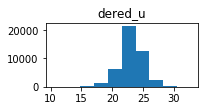

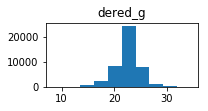

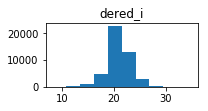

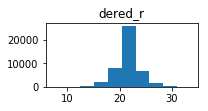

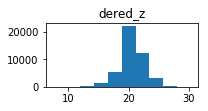

In [5]:
import matplotlib.pyplot as plt
visible_band = ['dered_u', 'dered_g', 'dered_i', 'dered_r', 'dered_z']
ax=[]
for i,band in enumerate(visible_band):
    fig1 = plt.figure()
    ax.append(fig1.add_subplot(3,2,i+1))
    ax[i].hist(train[band])
    ax[i].set_title(band)
plt.show()

In [6]:
train['dered_i'].describe()


count    45000.000000
mean        20.971828
std          2.248835
min          8.213940
25%         19.922500
50%         21.040150
75%         21.970625
max         34.828800
Name: dered_i, dtype: float64

In [7]:
features =['dered_u', 'dered_g', 'dered_i', 'dered_r', 'dered_z','#ra', 'dec','class']
for feature in features:
    total_objects = sum(train[feature]!=-9999)
    print("The number of objects for feature: %s is %d"%(feature,total_objects))

The number of objects for feature: dered_u is 45000
The number of objects for feature: dered_g is 45000
The number of objects for feature: dered_i is 45000
The number of objects for feature: dered_r is 45000
The number of objects for feature: dered_z is 45000
The number of objects for feature: #ra is 45000
The number of objects for feature: dec is 45000
The number of objects for feature: class is 45000


In [8]:
train['ug'] = train['dered_u'] - train['dered_g']
train['gr'] = train['dered_g'] - train['dered_r']
train['ri'] = train['dered_r'] - train['dered_i']
train['iz'] = train['dered_i'] - train['dered_z']

In [9]:
del train['dered_u']
del train['dered_g']
del train['dered_r']
del train['dered_i']
del train["dered_z"]

In [10]:
test['ug'] = test['dered_u'] - test['dered_g']
test['gr'] = test['dered_g'] - test['dered_r']
test['ri'] = test['dered_r'] - test['dered_i']
test['iz'] = test['dered_i'] - test['dered_z']

In [11]:
del test['dered_u']
del test['dered_g']
del test['dered_r']
del test['dered_i']
del test["dered_z"]

In [12]:
train["class"].value_counts()

0    19482
1    13452
2    12066
Name: class, dtype: int64

In [13]:
train.shape

(45000, 21)

In [14]:
train.isnull().sum()

id              0
err_i           0
err_z           0
err_u           0
err_g           0
err_r           0
extinction_r    0
skyVersion      0
run             0
rerun           0
camCol          0
field           0
obj             0
photoz          0
#ra             0
dec             0
class           0
ug              0
gr              0
ri              0
iz              0
dtype: int64

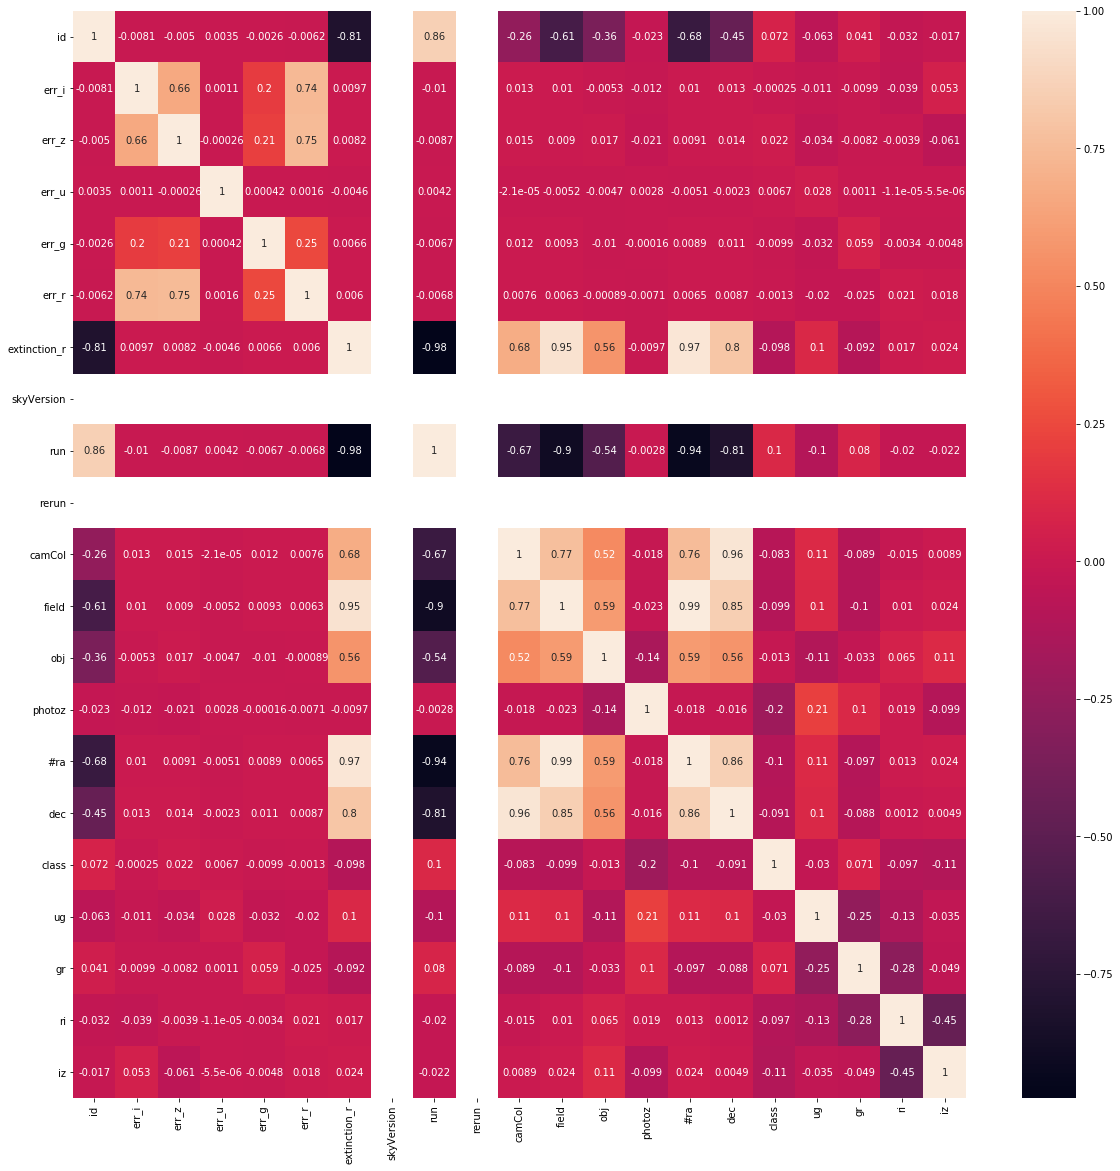

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

In [16]:
train["skyVersion"].value_counts()

1    45000
Name: skyVersion, dtype: int64

In [17]:
train["rerun"].value_counts()

40    45000
Name: rerun, dtype: int64

In [18]:
del train["skyVersion"]
del train["rerun"]

In [19]:
del test["skyVersion"]
del test["rerun"]

In [20]:
del train["id"]
del test["id"]

In [21]:
#del train["run"]
#del test["run"]

In [22]:
#del train["#ra"]
#del test["#ra"]

In [23]:
#del train["dec"]
#del test["dec"]

In [24]:
#del train["camCol"]
#del test["camCol"]

In [25]:
#train["run"]=train["run"].replace([752,745],[1,0])
#train["camCol"]=train["camCol"].replace([2,3,1],[3,2,1])

In [26]:
#test["run"]=test["run"].replace([752,745],[1,0])
#test["camCol"]=test["camCol"].replace([2,3,1],[3,2,1])

In [27]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)


#Training data
pc = pca.fit_transform(train[['camCol','field','obj','#ra','dec']])
train = pd.concat((train, pd.DataFrame(pc)), axis=1)
train.rename({0: 'pca_1', 1: 'pca_2', 2: 'pca_3'}, axis=1, inplace = True)
train.drop(['camCol','field','obj','#ra', 'dec'], axis = 1, inplace=True)

#Testing data
pc1 = pca.fit_transform(test[['camCol', 'field','obj','#ra','dec']])
test = pd.concat((test, pd.DataFrame(pc1)), axis=1)
test.rename({0: 'pca_1', 1: 'pca_2',2: 'pca_3'}, axis=1, inplace = True)
test.drop(['camCol', 'field','obj','#ra', 'dec'], axis = 1, inplace=True)

'''pca = PCA(n_components=5)


#Training data
pc = pca.fit_transform(train[['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r']])
train = pd.concat((train, pd.DataFrame(pc)), axis=1)
train.rename({0: 'pca_1', 1: 'pca_2', 2: 'pca_3',3: 'pca_4',4:'pca_5'}, axis=1, inplace = True)
train.drop(['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r'], axis = 1, inplace=True)

#Testing data
pc1 = pca.fit_transform(test[['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r']])
test = pd.concat((test, pd.DataFrame(pc1)), axis=1)
test.rename({0: 'pca_1', 1: 'pca_2', 2: 'pca_3',3: 'pca_4',4:'pca_5'}, axis=1, inplace = True)
test.drop(['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r'], axis = 1, inplace=True)'''



"pca = PCA(n_components=5)\n\n\n#Training data\npc = pca.fit_transform(train[['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r']])\ntrain = pd.concat((train, pd.DataFrame(pc)), axis=1)\ntrain.rename({0: 'pca_1', 1: 'pca_2', 2: 'pca_3',3: 'pca_4',4:'pca_5'}, axis=1, inplace = True)\ntrain.drop(['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r'], axis = 1, inplace=True)\n\n#Testing data\npc1 = pca.fit_transform(test[['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r']])\ntest = pd.concat((test, pd.DataFrame(pc1)), axis=1)\ntest.rename({0: 'pca_1', 1: 'pca_2', 2: 'pca_3',3: 'pca_4',4:'pca_5'}, axis=1, inplace = True)\ntest.drop(['run', '#ra', 'dec', 'camCol', 'field','obj','extinction_r'], axis = 1, inplace=True)"

In [28]:
'''#Training data
pca_error = PCA(n_components=2)
pc_er = pca_error.fit_transform(train[['err_i', 'err_z', 'err_r']])
train = pd.concat((train, pd.DataFrame(pc_er)), axis=1)
train.rename({0: 'err_1', 1: 'err_2'}, axis=1, inplace = True)
train.drop(['err_i', 'err_z', 'err_r'], axis = 1, inplace=True)

#Testing data
pca_error1 = PCA(n_components=2)
pc_er1 = pca_error1.fit_transform(test[['err_i', 'err_z', 'err_r']])
test = pd.concat((test, pd.DataFrame(pc_er1)), axis=1)
test.rename({0: 'err_1', 1: 'err_2'}, axis=1, inplace = True)
test.drop(['err_i', 'err_z', 'err_r'], axis = 1, inplace=True)'''

"#Training data\npca_error = PCA(n_components=2)\npc_er = pca_error.fit_transform(train[['err_i', 'err_z', 'err_r']])\ntrain = pd.concat((train, pd.DataFrame(pc_er)), axis=1)\ntrain.rename({0: 'err_1', 1: 'err_2'}, axis=1, inplace = True)\ntrain.drop(['err_i', 'err_z', 'err_r'], axis = 1, inplace=True)\n\n#Testing data\npca_error1 = PCA(n_components=2)\npc_er1 = pca_error1.fit_transform(test[['err_i', 'err_z', 'err_r']])\ntest = pd.concat((test, pd.DataFrame(pc_er1)), axis=1)\ntest.rename({0: 'err_1', 1: 'err_2'}, axis=1, inplace = True)\ntest.drop(['err_i', 'err_z', 'err_r'], axis = 1, inplace=True)"

In [29]:
train.head(1)

,err_i,err_z,err_u,err_g,err_r,extinction_r,run,photoz,class,ug,gr,ri,iz,pca_1,pca_2,pca_3
0,0.00195,0.00406,0.02796,0.00279,0.00197,0.27398,745,2.64988,0,2.2314,0.9184,0.3437,0.1736,-647.305637,278.09234,-3.378325


In [30]:
import seaborn as sns
#sns.heatmap(train.corr())
corr=train.corr()
corr.style.background_gradient()

,err_i,err_z,err_u,err_g,err_r,extinction_r,run,photoz,class,ug,gr,ri,iz,pca_1,pca_2,pca_3
err_i,1,0.661085,0.00105291,0.195493,0.738398,0.00970721,-0.0102361,-0.0120706,-0.000245558,-0.0111622,-0.00989747,-0.0389038,0.0530292,-0.00439358,0.0169554,-0.0028603
err_z,0.661085,1,-0.000260597,0.206202,0.749579,0.00817776,-0.00874505,-0.0206366,0.0224104,-0.0344277,-0.00822997,-0.00390174,-0.0605089,0.01675,-0.0021593,-0.00104856
err_u,0.00105291,-0.000260597,1,0.000424809,0.00161651,-0.00464793,0.00423376,0.0027556,0.00668458,0.0282934,0.00105091,-1.13027e-05,-5.46789e-06,-0.00489486,-0.00273062,-0.00111718
err_g,0.195493,0.206202,0.000424809,1,0.247049,0.00661322,-0.00674642,-0.000164142,-0.00992831,-0.0321697,0.0590547,-0.00335412,-0.00479241,-0.00887636,0.0194265,0.00291747
err_r,0.738398,0.749579,0.00161651,0.247049,1,0.00596618,-0.00675405,-0.00707245,-0.00134884,-0.0200044,-0.0251683,0.0212384,0.0178844,-0.000410127,0.00854953,-0.00271986
extinction_r,0.00970721,0.00817776,-0.00464793,0.00661322,0.00596618,1,-0.975112,-0.00965663,-0.0978466,0.10195,-0.0915927,0.0170441,0.0244772,0.606646,0.729262,-0.28107
run,-0.0102361,-0.00874505,0.00423376,-0.00674642,-0.00675405,-0.975112,1,-0.00279554,0.100238,-0.101028,0.0802398,-0.0195374,-0.0221209,-0.583053,-0.681879,0.441653
photoz,-0.0120706,-0.0206366,0.0027556,-0.000164142,-0.00707245,-0.00965663,-0.00279554,1,-0.202093,0.207265,0.101801,0.0191715,-0.098974,-0.140028,0.0857944,-0.0589543
class,-0.000245558,0.0224104,0.00668458,-0.00992831,-0.00134884,-0.0978466,0.100238,-0.202093,1,-0.0295401,0.0705013,-0.0967808,-0.10951,-0.0193833,-0.111947,0.0287018
ug,-0.0111622,-0.0344277,0.0282934,-0.0321697,-0.0200044,0.10195,-0.101028,0.207265,-0.0295401,1,-0.250932,-0.130191,-0.0348919,-0.0970492,0.214816,-0.0255281


In [31]:
y=train["class"]
del train["class"]
x=train

In [32]:
print(train.shape , test.shape , x.shape)

(45000, 15) (15000, 15) (45000, 15)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Best alpha using built-in LassoCV: 0.020663
Best score using built-in LassoCV: 0.098874
Lasso picked 10 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

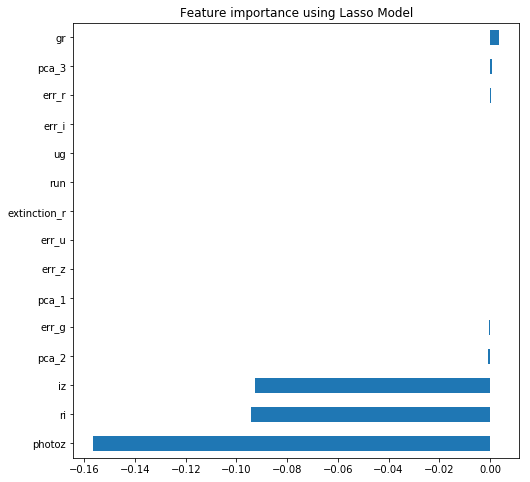

In [34]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x_train,y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x_train,y_train))
coef = pd.Series(reg.coef_, index = x_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,8)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

In [36]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


**Random Forest Classifier**

In [38]:
classifier = RandomForestClassifier( n_estimators = 600,
                                    random_state = 42)
classifier.fit(x_train1, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
pred = classifier.predict(x_test1)

In [40]:
from sklearn.metrics import confusion_matrix as cm
print(cm(pred,y_test))

[[4446  746  849]
 [ 841 2860  923]
 [ 504  484 1847]]


In [41]:
from sklearn.metrics import f1_score as f1
print(f1(pred,y_test,average=None))

[0.7515213  0.65641496 0.57235823]


In [42]:
from sklearn import metrics 
print("Acc :",metrics.accuracy_score(y_test,pred))

Acc : 0.678


In [43]:
test = scaler.transform(test)
pred1=classifier.predict(test)

In [44]:
sub["class"]=pred1

In [45]:
sub.head()

,id,class
0,45000,0
1,45001,0
2,45002,1
3,45003,0
4,45004,1


In [46]:
sub.to_csv('sub1.csv',index=False)
from IPython.display import FileLink
FileLink(r'sub1.csv')

/kaggle/working/sub1.csv